In [3]:
import sys
import os

# Add project root to Python path
project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)

print(sys.path[:5])  # just to confirm

['/Users/carolinalangaro/miniforge3/lib/python312.zip', '/Users/carolinalangaro/miniforge3/lib/python3.12', '/Users/carolinalangaro/miniforge3/lib/python3.12/lib-dynload', '', '/Users/carolinalangaro/miniforge3/lib/python3.12/site-packages']


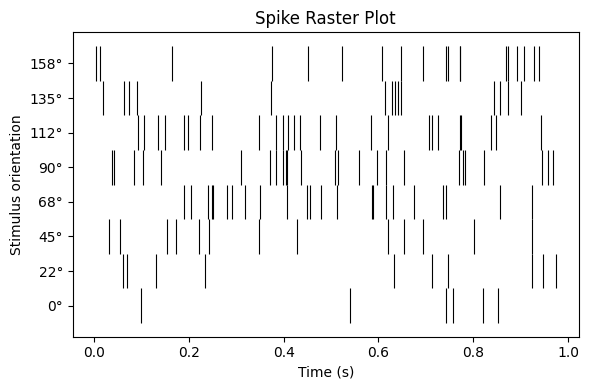

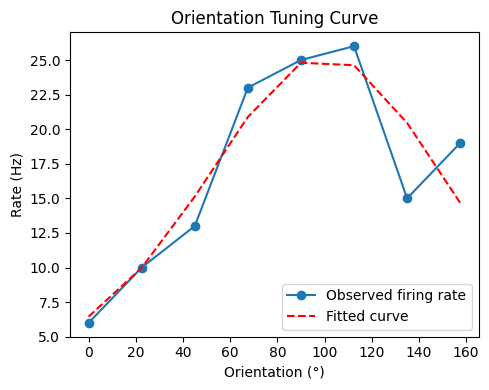

Fitted parameters: [100.35321403   1.23984717   0.76950216  24.52334829]


In [5]:
import numpy as np
from src.simulate import generate_orientations, tuning_function, simulate_spike_train
from src.analysis import compute_firing_rates, fit_tuning_curve
from src.visualization import plot_raster, plot_tuning_curve
from src.utils import set_seed

set_seed(0)

orientations = generate_orientations(8)
preferred = 90
kappa = 2.5

duration = 1.0
dt = 0.001

spike_trains = []
for theta in orientations:
    rate = tuning_function(np.array([theta]), preferred, kappa)[0]
    spikes = simulate_spike_train(rate, duration, dt)
    spike_trains.append(spikes)

rates = compute_firing_rates(spike_trains, duration)
params, predicted = fit_tuning_curve(orientations, rates)

plot_raster(spike_trains, orientations)
plot_tuning_curve(orientations, rates, predicted)

print("Fitted parameters:", params)
